# import  librabries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import scale
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

# Loading data

In [88]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\tdeaq\\cancer2017.csv',encoding= 'unicode_escape')
dataset.head(5)

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,,70,100,,60,280,,,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [89]:
#getting the shape of the dataset
dataset.shape

(51, 11)

In [90]:
#viewing the columns of the dataset
dataset.columns

Index(['State', 'Brain/ nervous system', 'Female breast', 'Colon & rectum',
       'Leukemia', 'Liver', 'Lung & bronchus', 'Non-Hodgkin Lymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')

In [91]:
dataset.columns = [c.strip() for c in dataset.columns.values.tolist()]
dataset.columns = [c.replace(' ','') for c in dataset.columns.values.tolist()] 
dataset.columns

Index(['State', 'Brain/nervoussystem', 'Femalebreast', 'Colon&rectum',
       'Leukemia', 'Liver', 'Lung&bronchus', 'Non-HodgkinLymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')

In [92]:
dataset.replace({r'[^\x00-\x7F]+':np.nan}, regex=True, inplace=True)
dataset.head()

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,NaN,70,100,NaN,60,280,NaN,NaN,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [93]:
#getting info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                51 non-null     object
 1   Brain/nervoussystem  47 non-null     object
 2   Femalebreast         51 non-null     object
 3   Colon&rectum         51 non-null     object
 4   Leukemia             49 non-null     object
 5   Liver                49 non-null     object
 6   Lung&bronchus        51 non-null     object
 7   Non-HodgkinLymphoma  46 non-null     object
 8   Ovary                45 non-null     object
 9   Pancreas             51 non-null     object
 10  Prostate             50 non-null     object
dtypes: object(11)
memory usage: 4.5+ KB


In [94]:
dataset=dataset.apply(pd.to_numeric, errors='ignore')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Brain/nervoussystem  47 non-null     float64
 2   Femalebreast         51 non-null     object 
 3   Colon&rectum         51 non-null     object 
 4   Leukemia             49 non-null     float64
 5   Liver                49 non-null     float64
 6   Lung&bronchus        51 non-null     object 
 7   Non-HodgkinLymphoma  46 non-null     float64
 8   Ovary                45 non-null     float64
 9   Pancreas             51 non-null     object 
 10  Prostate             50 non-null     float64
dtypes: float64(6), object(5)
memory usage: 4.5+ KB


In [95]:
data=dataset.ffill(axis=0)
data.head(10).style.background_gradient(cmap='Reds')

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
0,Alabama,320.000000,650,940,420.000000,470.000000,"3,200",320.000000,250.000000,710,450.000000
1,Alaska,320.000000,70,100,420.000000,60.000000,280,320.000000,250.000000,80,50.000000
2,Arizona,380.000000,810,"1,020",550.000000,660.000000,"2,820",430.000000,310.000000,930,600.000000
3,Arkansas,180.000000,420,600,250.000000,280.000000,"2,160",210.000000,150.000000,430,260.000000
4,California,1830.000000,4440,5240,2610.000000,3750.000000,"12,000",2140.000000,1530.000000,4510,3130.000000
5,Colorado,270.000000,570,660,340.000000,380.000000,"1,640",260.000000,240.000000,580,450.000000
6,Connecticut,190.000000,430,450,300.000000,300.000000,"1,630",230.000000,170.000000,490,310.000000
7,Delaware,50.000000,130,150,70.000000,110.000000,590,70.000000,50.000000,150,90.000000
8,District of Columbia,50.000000,100,90,70.000000,90.000000,220,70.000000,50.000000,100,70.000000
9,Florida,1250.000000,2910,3620,1800.000000,2020.000000,"11,790",1510.000000,970.000000,3170,2050.000000


In [96]:
df=data.describe().style.background_gradient(cmap='icefire')
df

,Brain/nervoussystem,Leukemia,Liver,Non-HodgkinLymphoma,Ovary,Prostate
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,350.588235,489.411765,592.352941,421.960784,298.235294,534.705882
std,336.347509,505.234250,676.368504,412.330060,285.325820,564.245879
min,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
25%,120.000000,150.000000,170.000000,140.000000,105.000000,175.000000
50%,270.000000,340.000000,440.000000,320.000000,230.000000,410.000000
75%,400.000000,550.000000,675.000000,480.000000,350.000000,610.000000
max,1830.000000,2610.000000,3750.000000,2140.000000,1530.000000,3130.000000


In [97]:
df=data.corr().style.background_gradient(cmap='bone')
df

,Brain/nervoussystem,Leukemia,Liver,Non-HodgkinLymphoma,Ovary,Prostate
Brain/nervoussystem,1.000000,0.959914,0.976930,0.992145,0.985375,0.964804
Leukemia,0.959914,1.000000,0.953012,0.972110,0.967817,0.979439
Liver,0.976930,0.953012,1.000000,0.973617,0.970883,0.961635
Non-HodgkinLymphoma,0.992145,0.972110,0.973617,1.000000,0.989164,0.970020
Ovary,0.985375,0.967817,0.970883,0.989164,1.000000,0.964462
Prostate,0.964804,0.979439,0.961635,0.970020,0.964462,1.000000


In [98]:
#testing
data.kurt().sort_values()

Non-HodgkinLymphoma     5.952105
Leukemia                6.139090
Ovary                   6.593680
Brain/nervoussystem     7.353766
Prostate                8.865133
Liver                  10.068647
dtype: float64

In [99]:
data.skew().sort_values()

Non-HodgkinLymphoma    2.238464
Leukemia               2.271614
Ovary                  2.299535
Brain/nervoussystem    2.384908
Prostate               2.631543
Liver                  2.865566
dtype: float64

# data visualization

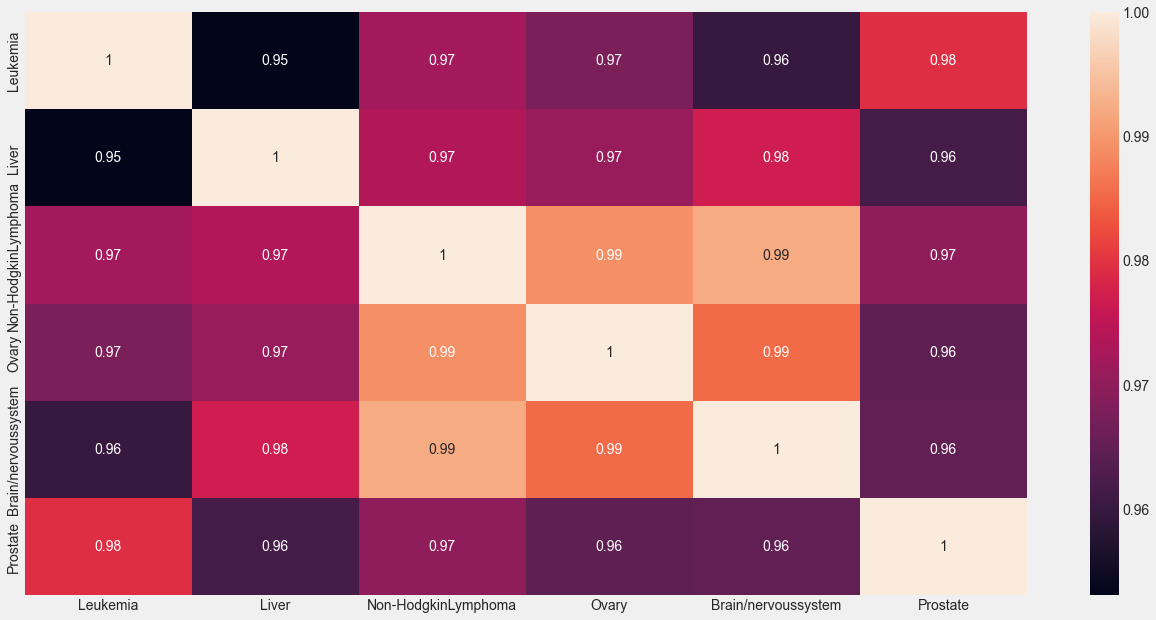

In [101]:
daf=['Leukemia', 'Liver','Non-HodgkinLymphoma', 'Ovary', 'Brain/nervoussystem', 'Prostate']
plt.figure(figsize=(20,10))
corr = data[daf].corr()
sns.heatmap(data=corr, annot=True);

correlation in betwn Ovary and Prostate: (0.9644617168851566, 5.5748708369455635e-30)
                                 OLS Regression Results                                
Dep. Variable:                  Ovary   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              1288.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                    2.33e-37
Time:                        21:51:07   Log-Likelihood:                         -295.47
No. Observations:                  51   AIC:                                      592.9
Df Residuals:                      50   BIC:                                      594.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err  

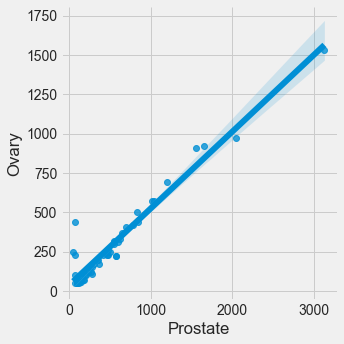

In [102]:
print('correlation in betwn Ovary and Prostate:',pearsonr(data.Ovary, data.Prostate))
print(sm.OLS(data.Ovary, data.Prostate).fit().summary())
chart =sns.lmplot(y= 'Ovary', x='Prostate', data=data)

correlation in betwn Liver and Leukemia: (0.9530115043157614, 4.578595249029973e-27)
                                 OLS Regression Results                                
Dep. Variable:                  Liver   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              908.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                    9.81e-34
Time:                        21:55:54   Log-Likelihood:                         -343.63
No. Observations:                  51   AIC:                                      689.3
Df Residuals:                      50   BIC:                                      691.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err   

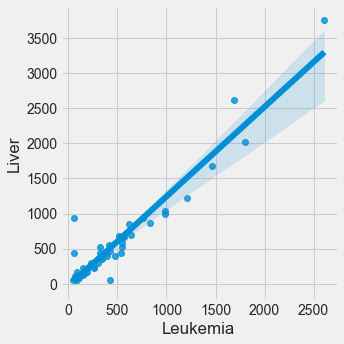

In [109]:
print('correlation in betwn Liver and Leukemia:',pearsonr(data.Liver, data.Leukemia))
print(sm.OLS(data.Liver, data.Leukemia).fit().summary())
chart =sns.lmplot(y= 'Liver', x='Leukemia', data=data)

1.from all the above analysis we can see that log likely hood is come under-360 to -430 which not that much high as higher the log likelihood weaker the model or bad data. here we can infer that the data is not that much bad
2.AIC and BIC is higher making the data not  so fit

plot displot

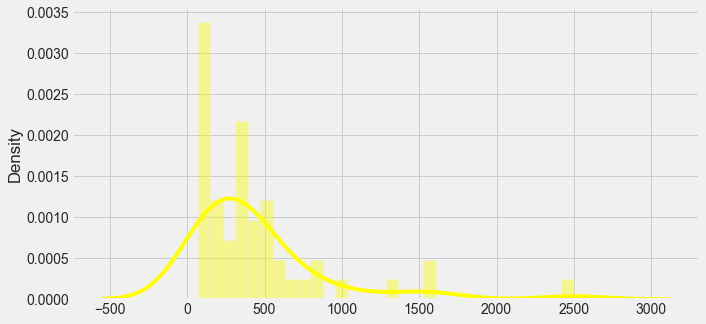

In [104]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.distplot(data[daf].mean(axis=1),bins=30,color='yellow');